## 6.5 PCA Unsupervised Machine Learning - Clustering
### This script contains the following:

#### 1. Importing libraries and data
#### 2. Standadizing the data
#### 3. PCA
#### 4. K-means clustering with PCA 
#### 5. K-means clustering with PCA Results

### 1. Importing libraries and data

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
#For standardizing features. We'll use the standatdScaler module.
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = 'C:/Users/iryna/Documents/Data analytics/Career foundry/6. Advanced Analytics & Dashboard Design/09-2022 World Happiness Analysis'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hap_full_categor.csv'))

In [5]:
df.shape

(1229, 15)

In [6]:
df.head()

,Unnamed: 0,country,region_id,region,Year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,happiness_category
0,0,Switzerland,WE,Western Europe,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,high
1,1,Iceland,WE,Western Europe,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,high
2,2,Denmark,WE,Western Europe,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,high
3,3,Norway,WE,Western Europe,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,high
4,4,Canada,NAANZ,North America and ANZ,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,high


#### Data cleaning

In [7]:
# Drop the redundant columns
df = df.drop(['Unnamed: 0'],axis = 1)

In [8]:
df.shape

(1229, 14)

In [9]:
# check for missing values
df.isnull().sum()

country                        0
region_id                      0
region                         0
Year                           0
happiness_rank                 0
happiness_score                0
economy_GDP_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
trust_government_corruption    0
generosity                     0
dystopia_residual              0
happiness_category             0
dtype: int64

In [10]:
# check for duplicates
dups = df.duplicated()

In [11]:
dups.shape

(1229,)

In [12]:
df= df[['happiness_score','economy_GDP_per_capita','family','health_life_expectancy', 'freedom', 
         'trust_government_corruption', 'generosity']]

In [13]:
df

,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
1224,3.471,1.50300,0.81500,0.28000,0.57100,0.10200,0.01200
1225,3.268,0.78500,0.13300,0.46200,0.62100,0.54400,0.18700
1226,2.995,0.94700,0.69000,0.27000,0.32900,0.10500,0.10600
1227,2.955,1.39200,0.49800,0.63100,0.10300,0.03400,0.08200


In [14]:
df.shape

(1229, 7)

In [15]:
df

,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
1224,3.471,1.50300,0.81500,0.28000,0.57100,0.10200,0.01200
1225,3.268,0.78500,0.13300,0.46200,0.62100,0.54400,0.18700
1226,2.995,0.94700,0.69000,0.27000,0.32900,0.10500,0.10600
1227,2.955,1.39200,0.49800,0.63100,0.10300,0.03400,0.08200


Text(0.5, 1.0, 'Visualization of raw data')

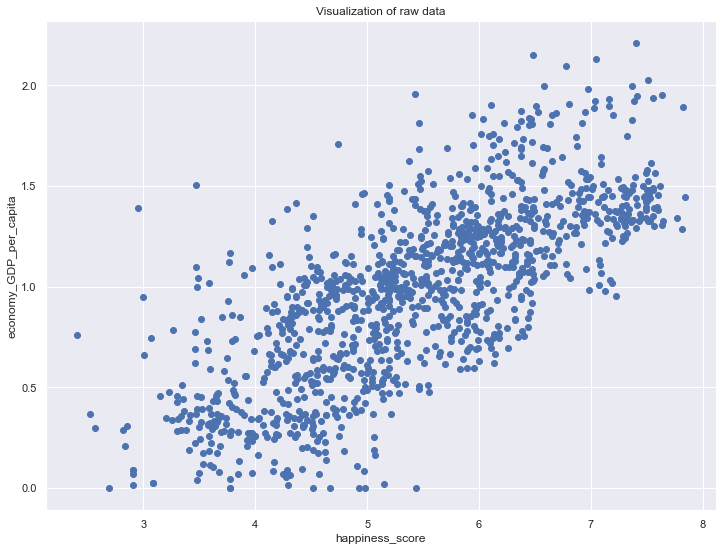

In [16]:
# Plot the data
# There are 1229 data points, we'll scatter accross happiness_score and economy_GDP_per_capita
plt.figure(figsize = (12,9))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('happiness_score')
plt.ylabel('economy_GDP_per_capita')
plt.title('Visualization of raw data')

### 2. Standadizing data

In [17]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[ 1.93374377  0.96629718  0.96015916 ...  1.45527919  2.60645391
   0.82358637]
 [ 1.91042476  0.74985002  1.12018331 ...  1.21682497  0.09556911
   2.03231385]
 [ 1.87993068  0.80307134  0.99376059 ...  1.35037229  3.18191951
   1.21006381]
 ...
 [-2.1847514  -0.06666981 -1.04169078 ... -0.72560488 -0.23325549
  -0.82923064]
 [-2.2206268   0.95593327 -1.62447981 ... -2.19002476 -0.87376432
  -1.03715395]
 [-2.71481034 -0.50098887 -3.13608884 ... -2.85743736 -1.1353806
  -0.97650965]]


In [18]:
# coverting to dataframe
df = pd.DataFrame(standardized_data, columns=df.columns)
print(df)

      happiness_score  economy_GDP_per_capita    family  \
0            1.933744                0.966297  0.960159   
1            1.910425                0.749850  1.120183   
2            1.879931                0.803071  0.993761   
3            1.875446                1.109898  0.903823   
4            1.790242                0.804933  0.878508   
...               ...                     ...       ...   
1224        -1.757834                1.211010 -0.662271   
1225        -1.939902               -0.438943 -2.732386   
1226        -2.184751               -0.066670 -1.041691   
1227        -2.220627                0.955933 -1.624480   
1228        -2.714810               -0.500989 -3.136089   

      health_life_expectancy   freedom  trust_government_corruption  \
0                   1.381801  1.455279                     2.606454   
1                   1.408402  1.216825                     0.095569   
2                   1.104621  1.350372                     3.181920   
3      

### 3.PCA

In [19]:
pca = PCA()
pca.fit(standardized_data)

PCA()

In [20]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.49613104, 0.18623641, 0.11123566, 0.08206908, 0.06079904,
       0.03613485, 0.02739393])

Text(0, 0.5, 'Cumulative Explained Variance')

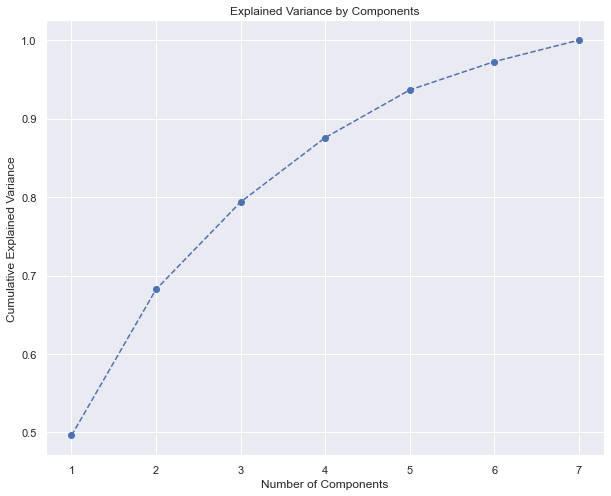

In [21]:
plt.figure (figsize = (10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title ('Explained Variance by Components')
plt.xlabel ('Number of Components')
plt.ylabel ('Cumulative Explained Variance')

#### The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 3 components.

In [22]:
# We choose three components based on the elbow graph
pca=PCA(n_components = 3)

In [23]:
#Fit the model to our data with the selected # of components - three
pca.fit(standardized_data)

PCA(n_components=3)

In [24]:
pca.transform(standardized_data)

array([[-3.66043828,  1.59943384,  0.57300919],
       [-2.90304291,  1.10636932, -1.65243887],
       [-3.59261396,  2.20900248,  0.60025594],
       ...,
       [ 2.5058405 , -0.32836719,  1.03968145],
       [ 2.32583293, -1.70066507,  0.76187263],
       [ 4.75011399, -1.02997437,  1.1201746 ]])

In [25]:
#Calculatin scores for the elements in the data
scores_pca = pca.transform(standardized_data)

#### 4. K-means clustering with PCA 

In [26]:
# We fit K means using the transformed data from the PCA

wcss =[]
for i in range (1,11):#There is no general ruling on this issue. It really depends on the data. In our case, we test an algorithm with up to 10 clusters
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

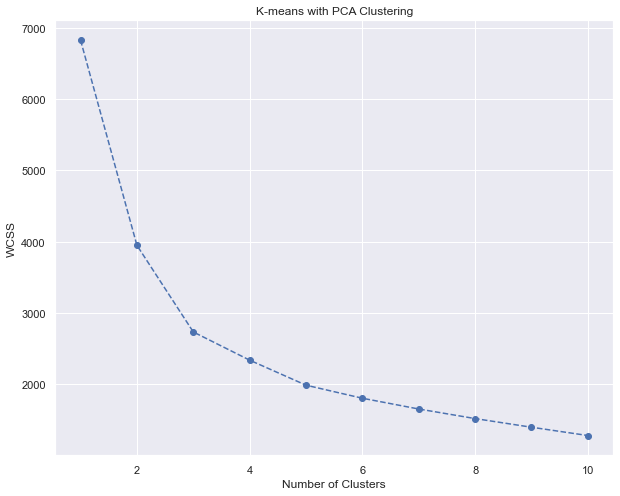

In [27]:
# Plotting the WCSS against the number of components on a graph
plt.figure(figsize =(10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.title ('K-means with PCA Clustering')
plt.xlabel ('Number of Clusters')
plt.ylabel ('WCSS')
plt.show()

#### We use the elbow technique to define numebr of clusters we would like to keep. In this instance, the kink comes at the 3 clusters mark. So, we’ll be keeping a four-cluster solution.

In [47]:
#Running K-means with number of clusters equal three
kmeans_pca = KMeans(n_clusters =3, init = 'k-means++', random_state = 42)

In [48]:
#Fitting the data with the t-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

### 5. K-means clustering with PCA Results

In [49]:
#Creating a new data frame with the original features and add the PCA scores and assigned clusters
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis =1)
df_segm_pca_kmeans.columns.values[-3: ]=['Component 1', 'Component 2', 'Component 3']

In [50]:
df_segm_pca_kmeans

,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,Component 1,Component 2,Component 3
0,1.933744,0.966297,0.960159,1.381801,1.455279,2.606454,0.823586,-3.660438,1.599434,0.573009
1,1.910425,0.749850,1.120183,1.408402,1.216825,0.095569,2.032314,-2.903043,1.106369,-1.652439
2,1.879931,0.803071,0.993761,1.104621,1.350372,3.181920,1.210064,-3.592614,2.209002,0.600256
3,1.875446,1.109898,0.903823,1.148487,1.482235,2.112540,1.258579,-3.462810,1.700041,0.145475
4,1.790242,0.804933,0.878508,1.233230,1.244040,1.792647,2.221264,-3.188168,2.182103,-0.735199
...,...,...,...,...,...,...,...,...,...,...
1224,-1.757834,1.211010,-0.662271,-1.363142,0.842491,-0.260319,-1.643597,1.054641,-0.750286,1.929170
1225,-1.939902,-0.438943,-2.732386,-0.607840,1.166477,3.727074,-0.127489,1.044138,3.082863,3.642050
1226,-2.184751,-0.066670,-1.041691,-1.404642,-0.725605,-0.233255,-0.829231,2.505841,-0.328367,1.039681
1227,-2.220627,0.955933,-1.624480,0.093512,-2.190025,-0.873764,-1.037154,2.325833,-1.700665,0.761873


In [51]:
#The last will be added the pca k-means clustering labels
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_


In [52]:
df_segm_pca_kmeans

,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,Component 1,Component 2,Component 3,Segment K-means PCA
0,1.933744,0.966297,0.960159,1.381801,1.455279,2.606454,0.823586,-3.660438,1.599434,0.573009,0
1,1.910425,0.749850,1.120183,1.408402,1.216825,0.095569,2.032314,-2.903043,1.106369,-1.652439,0
2,1.879931,0.803071,0.993761,1.104621,1.350372,3.181920,1.210064,-3.592614,2.209002,0.600256,0
3,1.875446,1.109898,0.903823,1.148487,1.482235,2.112540,1.258579,-3.462810,1.700041,0.145475,0
4,1.790242,0.804933,0.878508,1.233230,1.244040,1.792647,2.221264,-3.188168,2.182103,-0.735199,0
...,...,...,...,...,...,...,...,...,...,...,...
1224,-1.757834,1.211010,-0.662271,-1.363142,0.842491,-0.260319,-1.643597,1.054641,-0.750286,1.929170,1
1225,-1.939902,-0.438943,-2.732386,-0.607840,1.166477,3.727074,-0.127489,1.044138,3.082863,3.642050,1
1226,-2.184751,-0.066670,-1.041691,-1.404642,-0.725605,-0.233255,-0.829231,2.505841,-0.328367,1.039681,1
1227,-2.220627,0.955933,-1.624480,0.093512,-2.190025,-0.873764,-1.037154,2.325833,-1.700665,0.761873,1


In [53]:
df_segm_pca_kmeans['Segment K-means PCA'].value_counts()

2    630
1    399
0    200
Name: Segment K-means PCA, dtype: int64

In [54]:
df_segm_pca_kmeans.groupby('Segment K-means PCA').agg({'happiness_score': ['mean', 'median'],
                                                      'economy_GDP_per_capita':['mean', 'median'], 
                                                      'family':['mean', 'median'],
                                                       'health_life_expectancy':['mean', 'median'],
                                                       'freedom':['mean', 'median'],
                                                       'trust_government_corruption':['mean', 'median'],
                                                       'generosity':['mean', 'median']})

happiness_score           economy_GDP_per_capita  \
                               mean    median                   mean   
Segment K-means PCA                                                    
0                          1.373353  1.460189               1.126467   
1                         -1.029072 -0.985616              -1.046870   
2                          0.215760  0.288857               0.305409   

                                 family           health_life_expectancy  \
                       median      mean    median                   mean   
Segment K-means PCA                                                        
0                    1.070159  0.806385  0.804430               0.993725   
1                   -1.119147 -0.944410 -0.880756              -1.112114   
2                    0.293781  0.342131  0.387964               0.388871   

                                freedom           trust_government_corruption  \
                       median      mean    median                        mean   
Segment K-means PCA                                                             
0                    0.930093  1.058651  1.100063                    1.608269   
1                   -1.126591 -0.538908 -0.382179                   -0.175836   
2                    0.366147  0.005229  0.131178                   -0.399199   

                              generosity            
                       median       mean    median  
Segment K-means PCA                                 
0                    1.613225   0.819025  0.700478  
1                   -0.341511   0.214424  0.060790  
2                   -0.512914  -0.395809 -0.552000

In [55]:
df_segm_pca_kmeans.describe()

,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,Component 1,Component 2,Component 3,Segment K-means PCA
count,1.229000e+03,1.229000e+03,1.229000e+03,1.229000e+03,1.229000e+03,1.229000e+03,1.229000e+03,1.229000e+03,1.229000e+03,1.229000e+03,1229.000000
mean,-1.058732e-16,-4.444506e-16,-2.720905e-16,-2.623342e-16,-4.589042e-17,-1.246630e-17,-3.729952e-16,-1.084026e-16,-1.806710e-19,-4.155432e-17,1.349878
std,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.864335e+00,1.142242e+00,8.827705e-01,0.743896
min,-2.714810e+00,-2.242861e+00,-3.136089e+00,-2.525146e+00,-2.857437e+00,-1.180487e+00,-1.747559e+00,-4.220551e+00,-3.022120e+00,-3.331545e+00,0.000000
25%,-7.578076e-01,-7.078075e-01,-6.228112e-01,-6.991401e-01,-6.219291e-01,-6.752968e-01,-7.252690e-01,-1.264222e+00,-8.477152e-01,-5.573485e-01,1.000000
50%,-1.787764e-02,8.306685e-02,1.097302e-01,1.288703e-01,1.167605e-01,-3.144468e-01,-1.274895e-01,-6.966268e-02,-5.532212e-02,-3.474345e-02,2.000000
75%,7.142496e-01,7.353268e-01,7.305039e-01,7.567257e-01,7.647339e-01,2.989983e-01,4.922803e-01,1.374215e+00,7.731136e-01,5.585749e-01,2.000000
max,2.162449e+00,2.833387e+00,1.854042e+00,2.210018e+00,1.937566e+00,4.114988e+00,5.513081e+00,5.372335e+00,4.774722e+00,3.642050e+00,2.000000


In [56]:
# Creating a new column Segment and map the four clusters
df_segm_pca_kmeans['Segment']=df_segm_pca_kmeans['Segment K-means PCA'].map({0:'high', 1:'low', 2:'medium'})

In [57]:
df_segm_pca_kmeans['Segment'].value_counts()

medium    630
low       399
high      200
Name: Segment, dtype: int64

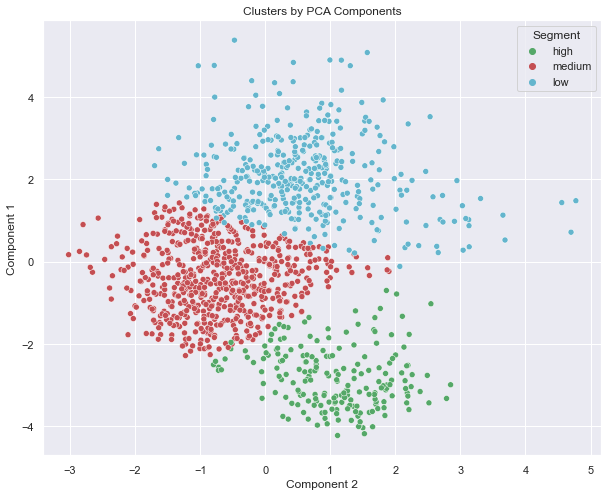

In [60]:
# Plotting the data by PCA components
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette =['g', 'r', 'c'])
plt.title('Clusters by PCA Components')
plt.show()

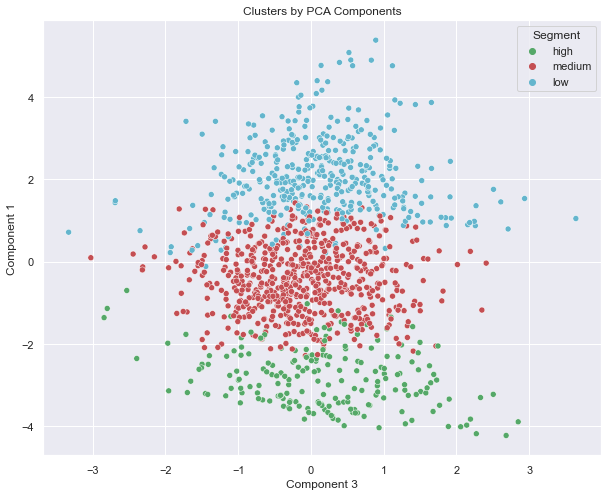

In [61]:
# Plotting the data by PCA components
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette =['g', 'r', 'c'])
plt.title('Clusters by PCA Components')
plt.show()

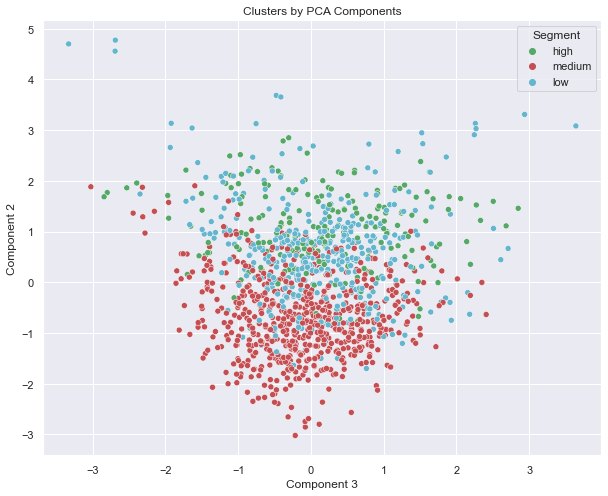

In [62]:
# Plotting the data by PCA components
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette =['g', 'r', 'c'])
plt.title('Clusters by PCA Components')
plt.show()

In [63]:
#Exporting to csv
df_segm_pca_kmeans.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hap_segm_pca_kmeans.csv'))